# 1. 카카오맵 불러오기

In [1]:

import requests
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium import webdriver
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys

search_url = 'https://m.map.kakao.com/'

# 셀레니움을 사용하여 Chrome 브라우저 열기
driver = webdriver.Chrome()
driver.get(search_url)
time.sleep(2)

# 검색어 입력란 찾기
search_box = driver.find_element("xpath", '//*[@id="innerQuery"]')

# 검색어 입력
search_query = '강남역 ' + ' 카페'
search_box.send_keys(search_query)

# 엔터 키 누르기 (검색 실행)
search_box.send_keys(Keys.RETURN)

#search_box = driver.find_element("xpath", '//*[@id="info.body"]')
time.sleep(2)

# 페이지 스크롤
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")


# # 더 보기 버튼 클릭
while True:
    try:
        more_button = WebDriverWait(driver, 3).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="daumContent"]/div/div/div/a'))
        )
        more_button.click()
        print("더보기 버튼")
        
    except :
        print("더 보기 버튼이 없거나 클릭할 수 없습니다.")
        break
    
    finally:
#         # 페이지 스크롤
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
# while True:
    
    
#     try:
#         # 더 보기 버튼이 나타날 때까지 대기
#         more_button = WebDriverWait(driver, 3).until(
            
            
#             EC.presence_of_element_located((By.CSS_SELECTOR, 'div._ajkl > [role="link"]'))

#         )
#         more_button.click()
#         print("더보기 버튼")
#     except:
#         print("더 보기 버튼이 없거나 클릭할 수 없습니다.")
#         break
    
#     finally:
#         # 페이지 스크롤
#         driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#         # 잠시 대기
#         time.sleep(3)


# # 현재 페이지 소스 가져오기
# page_source = driver.page_source
# soup = BeautifulSoup(page_source, 'html.parser')
# # 페이지 소스에서 원하는 정보 추출 및 처리

# # 작업이 끝나면 드라이버 종료
# driver.quit()


# print(soup)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=122.0.6261.131)
Stacktrace:
	GetHandleVerifier [0x00007FF70326AD02+56930]
	(No symbol) [0x00007FF7031DF602]
	(No symbol) [0x00007FF7030942E5]
	(No symbol) [0x00007FF703071D4C]
	(No symbol) [0x00007FF7031023F7]
	(No symbol) [0x00007FF703117891]
	(No symbol) [0x00007FF7030FBA43]
	(No symbol) [0x00007FF7030CD438]
	(No symbol) [0x00007FF7030CE4D1]
	GetHandleVerifier [0x00007FF7035E6F8D+3711213]
	GetHandleVerifier [0x00007FF7036404CD+4077101]
	GetHandleVerifier [0x00007FF70363865F+4044735]
	GetHandleVerifier [0x00007FF703309736+706710]
	(No symbol) [0x00007FF7031EB8DF]
	(No symbol) [0x00007FF7031E6AC4]
	(No symbol) [0x00007FF7031E6C1C]
	(No symbol) [0x00007FF7031D68D4]
	BaseThreadInitThunk [0x00007FFFAB71257D+29]
	RtlUserThreadStart [0x00007FFFAD1AAA58+40]


In [ ]:
import os
from time import sleep
import time
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys

##########################################################################
##################### variable related selenium ##########################
##########################################################################
# 서울 특별시 구 리스트
gu_list = ['한티역','도곡역']


# csv 파일에 헤더 만들어 주기
for index, gu_name in enumerate(gu_list):
    fileName = 'test.csv' # index.__str__() + '_' + gu_name + '.'+'csv'
    file = open(fileName, 'w', encoding='utf-8')
    file.write("카페명" + "|" + "주소" + "|" + "영업시간" + "|" + "전화번호" + "|" + "대표사진주소" + "\n")
    file.close()                                    # 처음에 csv파일에 칼럼명 만들어주기
    
    options = webdriver.ChromeOptions()
    # options.add_argument('headless')
    options.add_argument("Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36   ")
    options.add_argument('lang=ko_KR')
    chromedriver_path = "D:\workspace\pythonProject2\chromedriver.exe"
    driver = webdriver.Chrome(os.path.join(os.getcwd(), chromedriver_path), options=options)  # chromedriver 열기
    driver.get('https://map.kakao.com/')  # 주소 가져오기
    search_area = driver.find_element_by_xpath('//*[@id="search.keyword.query"]') # 검색 창
    search_area.send_keys(gu_name + ' 카페')  # 검색어 입력
    driver.find_element_by_xpath('//*[@id="search.keyword.submit"]').send_keys(Keys.ENTER)  # Enter로 검색
    driver.implicitly_wait(3) # 기다려 주자
    more_page = driver.find_element_by_id("info.search.place.more")
    # more_page.click()
    more_page.send_keys(Keys.ENTER) # 더보기 누르고
    # 첫 번째 검색 페이지 끝
    # driver.implicitly_wait(5) # 기다려 주자
    time.sleep(1)

    # next 사용 가능?
    next_btn = driver.find_element_by_id("info.search.page.next")
    has_next = "disabled" not in next_btn.get_attribute("class").split(" ")
    Page = 1
    while has_next: # 다음 페이지가 있으면 loop
    # for i in range(2, 6): # 2, 3, 4, 5
        file = open(fileName, 'a', encoding='utf-8')
        time.sleep(1)
        # place_lists = driver.find_elements_by_css_selector('#info\.search\.place\.list > li:nth-child(1)')
        # 페이지 루프
        #info\.search\.page\.no1 ~ .no5
        page_links = driver.find_elements_by_css_selector("#info\.search\.page a")
        pages = [link for link in page_links if "HIDDEN" not in link.get_attribute("class").split(" ")]
        # print(len(pages), "개의 페이지 있음")
        # pages를 하나씩 클릭하면서
        for i in range(1, 6):
            xPath = '//*[@id="info.search.page.no' + str(i) + '"]'
            try:
                page = driver.find_element_by_xpath(xPath)
                page.send_keys(Keys.ENTER)
            except ElementNotInteractableException:
                print('End of Page')
                break;
            sleep(3)
            place_lists = driver.find_elements_by_css_selector('#info\.search\.place\.list > li')
            for p in place_lists: # WebElement
                # print(p.get_attribute('innerHTML'))
                # print("type of p:", type(p))
                store_html = p.get_attribute('innerHTML')
                store_info = BeautifulSoup(store_html, "html.parser")
                # BS -> 분석
                #
                place_name = store_info.select('.head_item > .tit_name > .link_name')
                # place_address = store_info.select('.info_item > .addr > p')
                # place_hour = store_info.select('.info_item > .openhour > p > a')
                # place_tel = store_info.select('.info_item > .contact > span')
                 # print("length:", len(place_name))
                if len(place_name) == 0:
                    continue # 광고
                place_name = store_info.select('.head_item > .tit_name > .link_name')[0].text
                place_address = store_info.select('.info_item > .addr > p')[0].text
                place_hour = store_info.select('.info_item > .openhour > p > a')[0].text
                place_tel = store_info.select('.info_item > .contact > span')[0].text


                # 사진url 수집
                detail = p.find_element_by_css_selector('div.info_item > div.contact > a.moreview')
                detail.send_keys(Keys.ENTER)

                driver.switch_to.window(driver.window_handles[-1])

                place_photo = ""
                try:
                    photo = driver.find_element_by_css_selector('span.bg_present')
                    photo_url = photo.get_attribute('style')
                    m = re.search('"(.+?)"', photo_url)
                    if m:
                        place_photo = m.group(1)
                    else:
                        place_photo = ""
                except:
                    place_photo = ""
                driver.close()
                driver.switch_to.window(driver.window_handles[0])
                print(place_name, place_photo)

                file.write(place_name + "|" + place_address + "|" + place_hour + "|" + place_tel + "|" + place_photo + "\n")
            print(i, ' of', ' [ ' , Page, ' ] ')
        next_btn = driver.find_element_by_id("info.search.page.next")
        has_next = "disabled" not in next_btn.get_attribute("class").split(" ")
        if not has_next:
            print('Arrow is Disabled')
            driver.close()
            file.close()
            break # 다음 페이지 없으니까 종료
        else: # 다음 페이지 있으면
            Page += 1
            next_btn.send_keys(Keys.ENTER)
    print("End of Crawl")

In [17]:
import requests

url = 'http://openapi.seoul.go.kr:8088/41514b514379697336387a6d784b58/xml/citydata/1/5/광화문·덕수궁/SBIKE_STTS'

response = requests.get(url)
print(response.text)

<RESULT><CODE>ERROR-332</CODE><MESSAGE><![CDATA[요청종료위치 값을 확인하십시오.
요청인자 중 END_INDEX를 확인하십시오.]]></MESSAGE></RESULT>


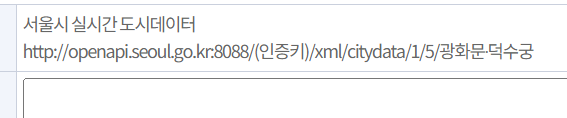

In [3]:
import requests

url = 'http://openapi.seoul.go.kr:8088/41514b514379697336387a6d784b58/json/citydata/1/5/강남역'

response = requests.get(url)
print(response)

<Response [200]>
